In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Import libraries done.")

Import libraries done.


In [3]:
df_original = pd.read_csv(r"/Users/mexmex/Documents/3-Math_LU/HT2025/STAN48-Programming-for-Data-Science/Final Project/Data/credit_risk_dataset.csv")
df_original.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df = df_original.copy()
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

## Cleaning data


In [127]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [128]:
df.shape

(32581, 12)

In [129]:
df[df['person_emp_length'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [130]:
df[df['loan_int_rate'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [131]:
df['loan_status'].unique()

array([1, 0])

In [132]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


- person_age:
    max = 144 : Is this too high as age to take into consideration for our analysis?

- person_emp_length:
    max = 123 : that is very high employment length. Would consider exclude this observation

In [133]:
df[df['person_age'] > 100]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [134]:
# Exclude all observations with person_age > 100
df = df[df['person_age'] < 100]
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32576.000000,3.257600e+04,31681.000000,32576.000000,29461.000000,32576.000000,32576.000000,32576.000000
mean,27.718044,6.588214e+04,4.789527,9589.117755,11.011547,0.218197,0.170212,5.803966
std,6.204990,5.253499e+04,4.142706,6321.886846,3.240623,0.413029,0.106778,4.053791
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [135]:
df[df['person_age'] < 18]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [136]:
df.shape
# Exclude 5 observations with person_age > 100

(32576, 12)

In [137]:
df[df['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [138]:
#sns.pairplot(df, hue='loan_status')

<Axes: >

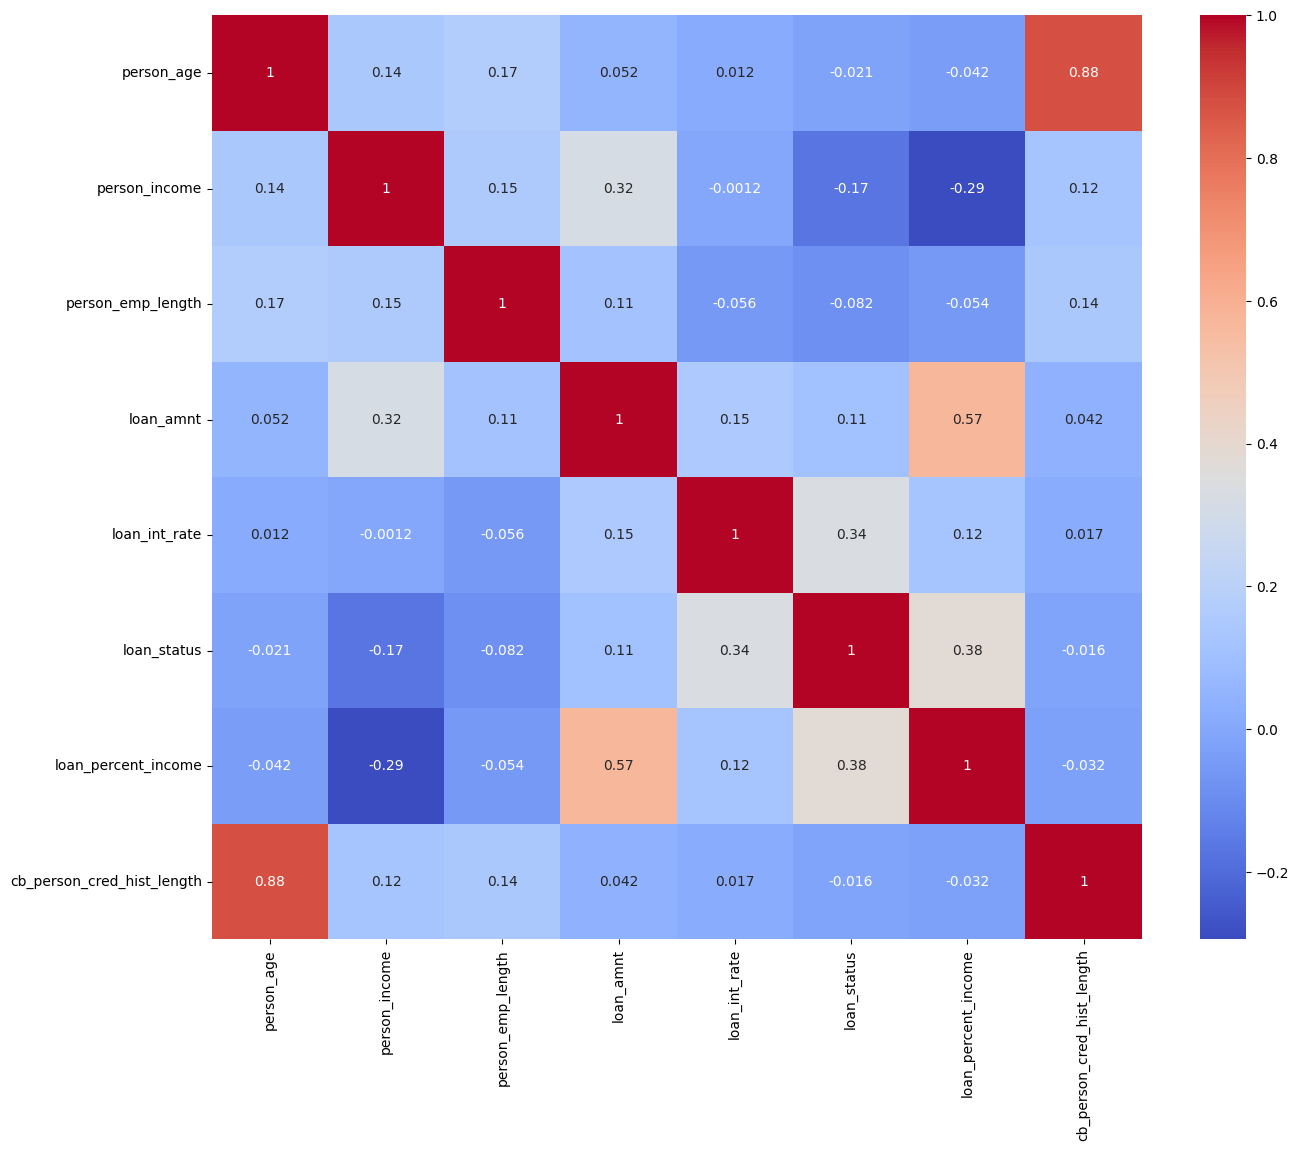

In [139]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)

In [140]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.140404,0.166249,0.051566,0.011967,-0.020721,-0.041665,0.878092
person_income,0.140404,1.000000,0.152717,0.317482,-0.001243,-0.168507,-0.294525,0.123006
person_emp_length,0.166249,0.152717,1.000000,0.113142,-0.056440,-0.082475,-0.054047,0.144487
loan_amnt,0.051566,0.317482,0.113142,1.000000,0.146879,0.105411,0.572567,0.042119
loan_int_rate,0.011967,-0.001243,-0.056440,0.146879,1.000000,0.335169,0.120414,0.016639
loan_status,-0.020721,-0.168507,-0.082475,0.105411,0.335169,1.000000,0.379374,-0.015504
loan_percent_income,-0.041665,-0.294525,-0.054047,0.572567,0.120414,0.379374,1.000000,-0.031514
cb_person_cred_hist_length,0.878092,0.123006,0.144487,0.042119,0.016639,-0.015504,-0.031514,1.000000


In [141]:
# intrest rate and loan grade are highly correlated, we will exclude loan grade in the model maybe
df[['loan_grade', 'loan_int_rate']].dropna().sort_values(by='loan_int_rate')
# for now populate the missing values with the correspoonding mean interest rate vs grade

,loan_grade,loan_int_rate
19625,A,5.42
13604,A,5.42
32123,A,5.42
13645,A,5.42
8876,A,5.42
...,...,...
13499,G,22.11
6449,G,22.11
27425,G,22.11
27851,G,22.48


<Axes: xlabel='loan_grade', ylabel='loan_int_rate'>

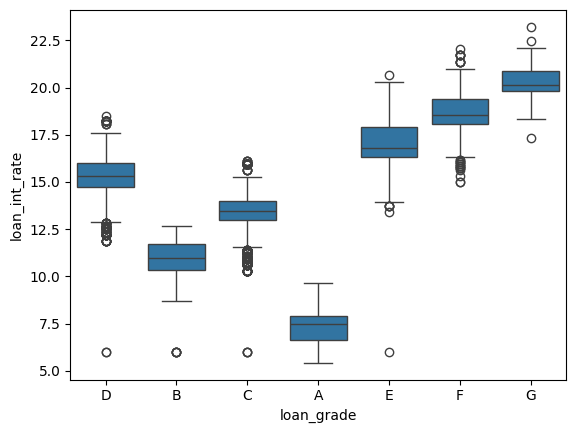

In [142]:
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df)

In [143]:
grade_interest_rate = df.groupby(by='loan_grade')['loan_int_rate'].mean(numeric_only=True).reset_index()
grade_interest_rate

,loan_grade,loan_int_rate
0,A,7.327651
1,B,10.995542
2,C,13.463649
3,D,15.361448
4,E,17.009455
5,F,18.609159
6,G,20.251525


In [144]:
grade_interest_rate_dict = dict(zip(grade_interest_rate['loan_grade'], grade_interest_rate['loan_int_rate']))
grade_interest_rate_dict

{'A': 7.327650910579088,
 'B': 10.995542425210264,
 'C': 13.46364915894267,
 'D': 15.3614484007242,
 'E': 17.0094551645857,
 'F': 18.609158878504672,
 'G': 20.25152542372881}

In [145]:
df['loan_int_rate'].fillna(df['loan_grade'].map(grade_interest_rate_dict), inplace=True)
df.isna().sum()

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_31518/242959617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(df['loan_grade'].map(grade_interest_rate_dict), inplace=True)
/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_31518/242959617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [146]:
df.fillna({'person_emp_length': df['person_emp_length'].median()}, inplace=True)
df.isna().sum()

/var/folders/w0/m62gyqfs4fz6fxrxl6443x3c0000gn/T/ipykernel_31518/3109484721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({'person_emp_length': df['person_emp_length'].median()}, inplace=True)


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [147]:
df[df['person_emp_length'] > 100]
# person emp_length > person age, so exclude these observations too

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [148]:
# Exclude those observations with person_emp_length > 100, which are 2 observations above
df[df['person_emp_length'] > df['person_age']]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [149]:
df[df['person_emp_length'] == df['person_age']]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [150]:
df = df[df['person_emp_length'] < df['person_age']]

In [151]:
df.shape

(32574, 12)

- There is alot of observations that have emplyment length NA, and have loan interest rate NA

    Populate the employment length by its median and same for interest rate because their medians and means are very close to each other. Hopefully it does not affect how estimation 

 

In [152]:
df.shape

(32574, 12)

In [153]:
# check if we have good data for loan_status for all ages
df.pivot_table(index='person_age', columns='loan_status', values='loan_amnt', aggfunc='count', fill_value=0).sort_values(by='person_age', ascending=False)



loan_status,0,1
person_age,,
94,1,0
84,1,0
80,1,0
78,1,0
76,1,0
73,3,0
70,5,2
69,5,0
67,1,0


- There is a rapid decrese in the number of observations when person_age > 50

- If person_age > 73, very observations all got no default. 1 observation mostly for all ages > 74, no observation here with loan_status = 1 

    -- Exclude these to avoid extreme skewed data for analysis ?

    -- Decide to keep

   



In [154]:
df.shape

(32574, 12)

In [155]:
df[df.duplicated(keep=False)].sort_values(by='person_age', ascending=False)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
31676,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.990000,0,0.10,N,12
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.990000,0,0.10,N,12
32279,43,11340,RENT,4.0,EDUCATION,C,1950,13.463649,1,0.17,N,11
29484,43,11340,RENT,4.0,EDUCATION,C,1950,13.463649,1,0.17,N,11
29831,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.420000,0,0.06,N,12
...,...,...,...,...,...,...,...,...,...,...,...,...
16587,21,26400,RENT,5.0,PERSONAL,C,4750,12.230000,0,0.18,N,3
13711,21,33009,OWN,5.0,VENTURE,B,12000,11.480000,0,0.36,N,4
17424,21,47580,MORTGAGE,5.0,EDUCATION,A,14000,6.030000,0,0.29,N,2
6191,21,26000,RENT,5.0,DEBTCONSOLIDATION,A,6000,7.490000,0,0.23,N,2


In [156]:
df.drop_duplicates(inplace=True)
df.shape

(32409, 12)



For now we have  observations 32409, and 11 predictors

In [157]:
Y_resp = df['loan_status']
Y_resp

1        0
2        1
3        1
4        1
5        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32409, dtype: int64

In [158]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [159]:
# Prepare X matrix by converting categorical variables to dummies
# person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file

df['person_home_ownership'].unique()


array(['OWN', 'MORTGAGE', 'RENT', 'OTHER'], dtype=object)

In [160]:
df['person_home_ownership'].value_counts()
# rent will be the reference category

person_home_ownership
RENT        16374
MORTGAGE    13366
OWN          2563
OTHER         106
Name: count, dtype: int64

In [161]:
# Let rent = 0, mortgage = 1, own=2, other = 3
df['person_home_ownership'] = pd.Categorical(df['person_home_ownership'], categories=['RENT', 'MORTGAGE', 'OWN', 'OTHER'])
df = pd.get_dummies(df, columns=['person_home_ownership'], drop_first=True, dtype=int)
df.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_OTHER
1,21,9600,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0,1,0
2,25,9600,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,1,0,0
3,23,65500,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0,0,0
4,24,54400,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0,0,0
5,21,9900,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0,1,0


In [162]:

df['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [163]:
df['loan_intent'].value_counts()
# education will be the reference category

loan_intent
EDUCATION            6409
MEDICAL              6042
VENTURE              5679
PERSONAL             5496
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64

In [164]:
df['loan_intent'] = pd.Categorical(df['loan_intent'], categories=['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'])
df = pd.get_dummies(df, columns=['loan_intent'], drop_first=True, dtype=int)
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_OTHER,loan_intent_MEDICAL,loan_intent_VENTURE,loan_intent_PERSONAL,loan_intent_HOMEIMPROVEMENT,loan_intent_DEBTCONSOLIDATION
1,21,9600,5.0,B,1000,11.14,0,0.10,N,2,0,1,0,0,0,0,0,0
2,25,9600,1.0,C,5500,12.87,1,0.57,N,3,1,0,0,1,0,0,0,0
3,23,65500,4.0,C,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,0,0
4,24,54400,8.0,C,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,0,0
5,21,9900,2.0,A,2500,7.14,1,0.25,N,2,0,1,0,0,1,0,0,0


In [165]:
df['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [166]:
df['loan_grade'].value_counts()
# Let A=1, B=2, C=3, D=4, E=5, F=6, G=7

loan_grade
A    10702
B    10384
C     6436
D     3619
E      963
F      241
G       64
Name: count, dtype: int64

In [167]:
df['loan_grade'] = df['loan_grade'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6 })
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_OTHER,loan_intent_MEDICAL,loan_intent_VENTURE,loan_intent_PERSONAL,loan_intent_HOMEIMPROVEMENT,loan_intent_DEBTCONSOLIDATION
1,21,9600,5.0,1,1000,11.14,0,0.10,N,2,0,1,0,0,0,0,0,0
2,25,9600,1.0,2,5500,12.87,1,0.57,N,3,1,0,0,1,0,0,0,0
3,23,65500,4.0,2,35000,15.23,1,0.53,N,2,0,0,0,1,0,0,0,0
4,24,54400,8.0,2,35000,14.27,1,0.55,Y,4,0,0,0,1,0,0,0,0
5,21,9900,2.0,0,2500,7.14,1,0.25,N,2,0,1,0,0,1,0,0,0


In [168]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    26680
Y     5729
Name: count, dtype: int64

In [169]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'N':0, 'Y':1})
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_OTHER,loan_intent_MEDICAL,loan_intent_VENTURE,loan_intent_PERSONAL,loan_intent_HOMEIMPROVEMENT,loan_intent_DEBTCONSOLIDATION
1,21,9600,5.0,1,1000,11.14,0,0.10,0,2,0,1,0,0,0,0,0,0
2,25,9600,1.0,2,5500,12.87,1,0.57,0,3,1,0,0,1,0,0,0,0
3,23,65500,4.0,2,35000,15.23,1,0.53,0,2,0,0,0,1,0,0,0,0
4,24,54400,8.0,2,35000,14.27,1,0.55,1,4,0,0,0,1,0,0,0,0
5,21,9900,2.0,0,2500,7.14,1,0.25,0,2,0,1,0,0,1,0,0,0


In [170]:
df.shape

(32409, 18)

In [171]:
df.to_csv(r"/Users/mexmex/Documents/3-Math_LU/HT2025/STAN48-Programming-for-Data-Science/Final Project/Data/cleaned_credit_risk_dataset.csv")

In [172]:
train_proportion = round(0.8 * df.shape[0])
train_proportion

25927

In [173]:
df['loan_status'].value_counts()

loan_status
0    25321
1     7088
Name: count, dtype: int64

In [174]:
X_train = df.loc[:train_proportion-1, df.columns != 'loan_status'].values
y_train = Y_resp.loc[:train_proportion-1].values
X_train.shape, y_train.shape

((25799, 17), (25799,))

In [206]:
class LogisticRegression:
    def __init__(self, Y_resp, X_data):
        self.X = np.c_[np.ones(len(X_data)), (X_data - np.mean(X_data, axis=0)) / np.std(X_data, axis=0)]
        self.Y = Y_resp

    def loglik(self, betas):
        return betas @ self.X.T @ self.Y - np.sum(np.log(1 + np.exp(self.X @ betas)))

    def grad_loglik(self, betas):
       
        #print("X matrix =", self.X)
        return self.X.T @ (self.Y - 1 / (1 + np.exp(-self.X @ betas)))

    def hess_loglik(self, betas):
       
        p = 1 / (1 + np.exp(-self.X @ betas))
        W = np.diag(p * (1 - p))
        return -self.X.T @ W @ self.X  - 1e-6 * np.eye(self.X.shape[1])
    
    def newton_raphson(self, tol=1e-6, max_iter=100):
        """ Use this method to find zeros of the gradient of the log-likelihood function.
        
        Algorithm:
        betas_new = betas - f(betas) / f'(betas)
        where f is the gradient of the log-likelihood function and f' is the Hessian of the log-likelihood function.

        So:
        betas_new = betas - grad_loglik(betas) @ inv(hess_loglik(betas))
        Use np.linalg.solve instead of np.linalg.inv for better numerical stability. And it's expensive to compute the inverse of a matrix.

        Update betas until convergence or max_iter is reached.
        """
        betas = np.zeros(self.X.shape[1])  # Initialize betas to zero vector
        for i in range(max_iter):
            print(f"Iteration {i+1}, betas = {betas}")
            # f_betas is the gradient of the log-likelihood function at betas
            f_betas = self.grad_loglik(betas)

            # f_grad_betas is the Hessian of the log-likelihood function at betas
            f_grad_betas = self.hess_loglik(betas)
            
            betas_new = betas - np.linalg.solve(f_grad_betas, f_betas)

            if np.linalg.norm(betas_new - betas) < tol:
                print(f"Converged in {i+1} iterations.")
                return betas_new

            betas = betas_new
        print("Max iterations reached.")
        return betas
    
    def make_predictions(self,X_test, betas, threshold=0.5):
        """ Make predictions based on the fitted model.
        If the predicted probability is greater than the threshold, predict 1 (fully paid), else 0 (charged off).
        """
        X_test = np.c_[np.ones(len(X_test)), (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)]
        probs = 1 / (1 + np.exp(-X_test @ betas))
        return (probs >= threshold).astype(int)
    
    def make_predictions_prob(self,X_test, betas, threshold=0.5):
        """ Make predictions based on the fitted model.
        If the predicted probability is greater than the threshold, predict 1 (fully paid), else 0 (charged off).
        """
        X_test = np.c_[np.ones(len(X_test)), (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)]
        probs = 1 / (1 + np.exp(-X_test @ betas))
        return probs
    
    def __str__(self):
        return f"LogisticRegression with {self.X.shape[1]-1} predictors and {self.X.shape[0]} observations."    

print("LogisticRegression class defined.")

LogisticRegression class defined.


In [176]:
model0 = LogisticRegression(Y_resp=y_train, X_data=X_train)
print(model0)

LogisticRegression with 17 predictors and 25799 observations.


In [177]:
betas = model0.newton_raphson()

Iteration 1, betas = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration 2, betas = [-1.1033761  -0.03479969  0.12711534 -0.00213936  0.8221789  -0.45175132
 -0.27691633  0.86620176 -0.03429122 -0.01490433 -0.18341525 -0.23752141
 -0.00944509  0.12776645 -0.00748988  0.05892864  0.16051181  0.14341108]
Iteration 3, betas = [-1.57006552 -0.05106042  0.10584276 -0.00868217  1.12261876 -0.62645228
 -0.27624622  1.24497536 -0.04277347 -0.02150881 -0.31569315 -0.45383424
 -0.02158157  0.22102208 -0.02462352  0.10222881  0.27721188  0.24703436]
Iteration 4, betas = [-1.80814342 -0.05682124  0.06965611 -0.0149656   1.23404099 -0.6950423
 -0.23506205  1.41332669 -0.04693494 -0.0233984  -0.38652371 -0.60261787
 -0.02863178  0.267883   -0.04013005  0.12337744  0.33833856  0.3004873 ]
Iteration 5, betas = [-1.86082327 -0.05765149  0.05081145 -0.01666283  1.2543665  -0.70071348
 -0.22455435  1.43971564 -0.04793756 -0.02356537 -0.40052195 -0.64365611
 -0.03005008  0.27643995 -0.044371

In [178]:
import numpy as np
from scipy.stats import binomtest

class ConfusionMatrix:
    def __init__(self, y_true, y_pred):
        self.y_true = np.array(y_true)
        self.y_pred = np.array(y_pred)

        # Basic counts
        self.tp = np.sum((self.y_true == 1) & (self.y_pred == 1))
        self.tn = np.sum((self.y_true == 0) & (self.y_pred == 0))
        self.fp = np.sum((self.y_true == 0) & (self.y_pred == 1))
        self.fn = np.sum((self.y_true == 1) & (self.y_pred == 0))
        self.n = len(self.y_true)

        # Metrics
        self.accuracy = (self.tp + self.tn) / self.n
        self.precision = self.tp / (self.tp + self.fp) if (self.tp + self.fp) > 0 else 0
        self.recall = self.tp / (self.tp + self.fn) if (self.tp + self.fn) > 0 else 0  # Sensitivity
        self.specificity = self.tn / (self.tn + self.fp) if (self.tn + self.fp) > 0 else 0
        self.f1_score = (
            2 * (self.precision * self.recall) / (self.precision + self.recall)
            if (self.precision + self.recall) > 0 else 0
        )

        # No Information Rate (majority class proportion)
        majority_class_count = max(np.sum(self.y_true == 0), np.sum(self.y_true == 1))
        self.nir = majority_class_count / self.n

        # Binomial test for accuracy > NIR
        # Null: accuracy <= NIR, Alternative: accuracy > NIR
        successes = self.tp + self.tn  # correct predictions
        self.p_value = binomtest(successes, n=self.n, p=self.nir, alternative="greater").pvalue

    def __str__(self):
        return (
            f"Confusion Matrix:\n"
            f"TP: {self.tp}, TN: {self.tn}, FP: {self.fp}, FN: {self.fn}\n"
            f"Accuracy: {self.accuracy:.4f}, "
            f"Precision: {self.precision:.4f}, "
            f"Recall (Sensitivity): {self.recall:.4f}, "
            f"Specificity: {self.specificity:.4f}, "
            f"F1 Score: {self.f1_score:.4f}\n"
            f"No Information Rate (NIR): {self.nir:.4f}, "
            f"p-value(Acc > NIR): {self.p_value:.4g}"
        )


In [179]:
X_test = df.loc[train_proportion:, df.columns != 'loan_status'].values
y_test = Y_resp.loc[train_proportion:].values
X_test.shape, y_test.shape

((6610, 17), (6610,))

In [180]:
p_pred = model0.make_predictions(X_test=X_test, betas=betas, threshold=0.5)
p_pred.shape

(6610,)

In [181]:
print(ConfusionMatrix(y_true=y_test, y_pred=p_pred))

Confusion Matrix:
TP: 741, TN: 4951, FP: 354, FN: 564
Accuracy: 0.8611, Precision: 0.6767, Recall (Sensitivity): 0.5678, Specificity: 0.9333, F1 Score: 0.6175
No Information Rate (NIR): 0.8026, p-value(Acc > NIR): 6.239e-36


In [182]:
class LinearRegression():
    def __init__(self, Y_resp, X_data):
        self.X = np.c_[np.ones(len(X_data)), (X_data - np.mean(X_data, axis=0)) / np.std(X_data, axis=0)]
        self.Y = Y_resp
    
    def betas_estimates(self):
        return np.linalg.solve(self.X.T @ self.X, self.X.T @ Y)
    
    def Y_hat(self, betas_estimates):
        return self.X @ betas_estimates

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [184]:
X_predictors = df.loc[:, df.columns != 'loan_status']
#X_predictors = pd.DataFrame(X_predictors)
X_predictors

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_OTHER,loan_intent_MEDICAL,loan_intent_VENTURE,loan_intent_PERSONAL,loan_intent_HOMEIMPROVEMENT,loan_intent_DEBTCONSOLIDATION
1,21,9600,5.0,1,1000,11.14,0.10,0,2,0,1,0,0,0,0,0,0
2,25,9600,1.0,2,5500,12.87,0.57,0,3,1,0,0,1,0,0,0,0
3,23,65500,4.0,2,35000,15.23,0.53,0,2,0,0,0,1,0,0,0,0
4,24,54400,8.0,2,35000,14.27,0.55,1,4,0,0,0,1,0,0,0,0
5,21,9900,2.0,0,2500,7.14,0.25,0,2,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,2,5800,13.16,0.11,0,30,1,0,0,0,0,1,0,0
32577,54,120000,4.0,0,17625,7.49,0.15,0,19,1,0,0,0,0,1,0,0
32578,65,76000,3.0,1,35000,10.99,0.46,0,28,0,0,0,0,0,0,1,0
32579,56,150000,5.0,1,15000,11.48,0.10,0,26,1,0,0,0,0,1,0,0


In [185]:
X_predictors = add_constant(X_predictors)
X_predictors

,const,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_OTHER,loan_intent_MEDICAL,loan_intent_VENTURE,loan_intent_PERSONAL,loan_intent_HOMEIMPROVEMENT,loan_intent_DEBTCONSOLIDATION
1,1.0,21,9600,5.0,1,1000,11.14,0.10,0,2,0,1,0,0,0,0,0,0
2,1.0,25,9600,1.0,2,5500,12.87,0.57,0,3,1,0,0,1,0,0,0,0
3,1.0,23,65500,4.0,2,35000,15.23,0.53,0,2,0,0,0,1,0,0,0,0
4,1.0,24,54400,8.0,2,35000,14.27,0.55,1,4,0,0,0,1,0,0,0,0
5,1.0,21,9900,2.0,0,2500,7.14,0.25,0,2,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1.0,57,53000,1.0,2,5800,13.16,0.11,0,30,1,0,0,0,0,1,0,0
32577,1.0,54,120000,4.0,0,17625,7.49,0.15,0,19,1,0,0,0,0,1,0,0
32578,1.0,65,76000,3.0,1,35000,10.99,0.46,0,28,0,0,0,0,0,0,1,0
32579,1.0,56,150000,5.0,1,15000,11.48,0.10,0,26,1,0,0,0,0,1,0,0


In [186]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_predictors.columns
vif_data["VIF"] = [variance_inflation_factor(X_predictors.values, i) for i in range(X_predictors.shape[1])]

print(vif_data)

                          Variable         VIF
0                            const  110.085588
1                       person_age    4.442829
2                    person_income    1.805183
3                person_emp_length    1.108665
4                       loan_grade    8.734323
5                        loan_amnt    2.559309
6                    loan_int_rate    8.362199
7              loan_percent_income    2.484904
8        cb_person_default_on_file    1.408399
9       cb_person_cred_hist_length    4.379426
10  person_home_ownership_MORTGAGE    1.247414
11       person_home_ownership_OWN    1.095367
12     person_home_ownership_OTHER    1.004353
13             loan_intent_MEDICAL    1.592588
14             loan_intent_VENTURE    1.566066
15            loan_intent_PERSONAL    1.552921
16     loan_intent_HOMEIMPROVEMENT    1.409844
17   loan_intent_DEBTCONSOLIDATION    1.533329


In [187]:
X_train1 = df.loc[:train_proportion-1].drop(columns=['loan_status', 'loan_int_rate']).values

X_train1.shape,y_train.shape

((25799, 16), (25799,))

In [188]:
X_test1 = df.loc[train_proportion:].drop(columns=['loan_status', 'loan_int_rate']).values
X_test1.shape, y_test.shape

((6610, 16), (6610,))

In [189]:
model1 = LogisticRegression(Y_resp=y_train, X_data=X_train1)
print(model1)

LogisticRegression with 16 predictors and 25799 observations.


In [190]:
betas = model1.newton_raphson()

Iteration 1, betas = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration 2, betas = [-1.1033761  -0.03270549  0.12842244 -0.00154903  0.5639734  -0.45749533
  0.86931301 -0.03414518 -0.01821199 -0.17585487 -0.23576264 -0.00979951
  0.12714043 -0.00715999  0.0582342   0.16120228  0.14357112]
Iteration 3, betas = [-1.57518822 -0.04803536  0.10921697 -0.00942486  0.87536943 -0.63004722
  1.24607684 -0.04461319 -0.02526948 -0.30841648 -0.45129241 -0.02121527
  0.21901357 -0.02485629  0.10043997  0.27636341  0.24556372]
Iteration 4, betas = [-1.8156572  -0.05388095  0.07493553 -0.016059    1.02733315 -0.69945551
  1.41666096 -0.04884608 -0.02678898 -0.38080106 -0.59999623 -0.02820443
  0.26597582 -0.04051925  0.12153251  0.33723718  0.29893853]
Iteration 5, betas = [-1.86844895 -0.05482322  0.05683147 -0.01773658  1.05727682 -0.70584533
  1.44403087 -0.04973973 -0.0268206  -0.39525645 -0.64128204 -0.0296724
  0.2747447  -0.04479197  0.12534196  0.34966942  0.30950375]
Iteration 6

In [191]:
p_pred = model1.make_predictions(X_test=X_test1, betas=betas, threshold=0.5)
p_pred.shape

(6610,)

In [192]:
print(ConfusionMatrix(y_true=y_test, y_pred=p_pred))
'''
Confusion Matrix:
TP: 741, TN: 4951, FP: 354, FN: 564
Accuracy: 0.8611, Precision: 0.6767, Recall: 0.5678, F1 Score: 0.6175
'''

Confusion Matrix:
TP: 738, TN: 4944, FP: 361, FN: 567
Accuracy: 0.8596, Precision: 0.6715, Recall (Sensitivity): 0.5655, Specificity: 0.9320, F1 Score: 0.6140
No Information Rate (NIR): 0.8026, p-value(Acc > NIR): 4.071e-34


'\nConfusion Matrix:\nTP: 741, TN: 4951, FP: 354, FN: 564\nAccuracy: 0.8611, Precision: 0.6767, Recall: 0.5678, F1 Score: 0.6175\n'

In [193]:
import numpy as np
import matplotlib.pyplot as plt

# Manual ROC computation
def roc_curve_manual(y_true, y_scores):
    # Sort scores descending
    order = np.argsort(-y_scores)
    y_true = y_true[order]
    y_scores = y_scores[order]

    thresholds = np.r_[np.inf, np.unique(y_scores)]
    tpr, fpr = [], []
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)

    for thr in thresholds:
        y_pred = (y_scores >= thr).astype(int)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        tpr.append(TP / P if P > 0 else 0)
        fpr.append(FP / N if N > 0 else 0)
    return np.array(fpr), np.array(tpr), thresholds

# Find optimal threshold: closest to top-left (max TPR, max specificity)
def optimal_threshold(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve_manual(y_true, y_scores)
    specificity = 1 - fpr
    distances = np.sqrt((1 - tpr)**2 + (1 - specificity)**2)
    idx = np.argmin(distances)
    return thresholds[idx], fpr, tpr, thresholds, idx

# Example usage
np.random.seed(0)
y_true = np.random.randint(0,2,200)
y_scores = np.random.rand(200)

best_thresh, fpr, tpr, thresholds, idx = optimal_threshold(y_true, y_scores)
specificity = 1 - fpr

# Plot ROC vs Specificity
plt.figure(figsize=(6.5,5))
order = np.argsort(-specificity)  # ensure left->right goes 1->0
plt.plot(specificity[order], tpr[order], lw=2, label='ROC curve')
plt.scatter(specificity[idx], tpr[idx], color='red', s=70, label=f'Optimal thr={best_thresh:.2f}')
plt.xlabel('Specificity (1 - FPR)')
plt.ylabel('Sensitivity / TPR')
plt.title('ROC Curve vs Specificity')
plt.xlim(1,0)  # top-left = high specificity
plt.ylim(0,1)
plt.legend(loc='lower left')
plt.grid(alpha=0.3)
plt.show()


Initial BIC (null model): 27466.379
Add main effect loan_percent_income, BIC: 24016.980
Add main effect loan_int_rate, BIC: 21438.056
Add interaction ('loan_percent_income', 'person_income'), BIC: 20450.623
Add main effect person_home_ownership_OWN, BIC: 19771.230
Add main effect loan_amnt, BIC: 19266.434
Add main effect person_home_ownership_MORTGAGE, BIC: 18910.721
Add main effect loan_intent_HOMEIMPROVEMENT, BIC: 18697.448
Add main effect loan_intent_DEBTCONSOLIDATION, BIC: 18531.758
Add main effect loan_intent_MEDICAL, BIC: 18497.910
Add main effect loan_intent_PERSONAL, BIC: 18469.170
Add main effect person_age, BIC: 18464.300
Final selected main effects: ['loan_percent_income', 'loan_int_rate', 'person_home_ownership_OWN', 'loan_amnt', 'person_home_ownership_MORTGAGE', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'person_age']
Final selected interactions: [('loan_percent_income', 'person_income')]


In [194]:
main_vars = [
    'loan_percent_income', 'loan_grade', 'person_home_ownership_OWN',
    'loan_amnt', 'person_home_ownership_MORTGAGE',
    'loan_intent_VENTURE', 'loan_intent_DEBTCONSOLIDATION',
    'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL'
]

# Add interaction column
df['loan_percent_income_x_person_income'] = df['loan_percent_income'] * df['person_income']
X_train2 = df.loc[:train_proportion-1, main_vars + ['loan_percent_income_x_person_income']].values
y_train = df.loc[:train_proportion-1, 'loan_status'].values

# Test data
X_test2 = df.loc[train_proportion:, main_vars + ['loan_percent_income_x_person_income']].values
y_test = df.loc[train_proportion:, 'loan_status'].values

print("X_train shape:", X_train2.shape)
print("X_test shape:", X_test2.shape)

X_train shape: (25799, 11)
X_test shape: (6610, 11)


In [207]:
model2 = LogisticRegression(y_train,X_train2)
print(model2)

LogisticRegression with 11 predictors and 25799 observations.


In [208]:
betas_model2 = model2.newton_raphson()

Iteration 1, betas = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration 2, betas = [-1.1033761   0.78562729  0.51957551 -0.23293298  3.4956964  -0.17382044
 -0.00894944  0.14216181  0.15940011  0.0844218   0.05542962 -3.85825712]
Iteration 3, betas = [-1.58885948  1.22803946  0.81200256 -0.44974407  6.34041104 -0.31606746
 -0.02901853  0.24028706  0.27550187  0.13646103  0.09456039 -6.93819919]
Iteration 4, betas = [-1.84827549  1.46386013  0.96559451 -0.60734096  8.39789126 -0.40221677
 -0.04639482  0.29386215  0.34159859  0.16258403  0.11478438 -9.1206951 ]
Iteration 5, betas = [-1.91106008  1.51839112  1.00040043 -0.65610689  9.01284675 -0.42262173
 -0.0514501   0.30588916  0.3568945   0.16810534  0.11892222 -9.76366517]
Iteration 6, betas = [-1.91415115  1.52091505  1.00196363 -0.659279    9.04840331 -0.4235102
 -0.05171721  0.3064183   0.35758354  0.16834081  0.11908757 -9.80047825]
Iteration 7, betas = [-1.91415908  1.52092092  1.00196709 -0.65929051  9.04850384 -0.42351189
 -0.0517

In [197]:
y_pred2 = model2.make_predictions(X_test=X_test2, betas=betas_model2, threshold=0.5)
print(ConfusionMatrix(y_test, y_pred2))

'''
Confusion Matrix:
TP: 741, TN: 4951, FP: 354, FN: 564
Accuracy: 0.8611, Precision: 0.6767, Recall: 0.5678, F1 Score: 0.6175
'''

Confusion Matrix:
TP: 792, TN: 4959, FP: 346, FN: 513
Accuracy: 0.8700, Precision: 0.6960, Recall (Sensitivity): 0.6069, Specificity: 0.9348, F1 Score: 0.6484
No Information Rate (NIR): 0.8026, p-value(Acc > NIR): 9.105e-48


'\nConfusion Matrix:\nTP: 741, TN: 4951, FP: 354, FN: 564\nAccuracy: 0.8611, Precision: 0.6767, Recall: 0.5678, F1 Score: 0.6175\n'

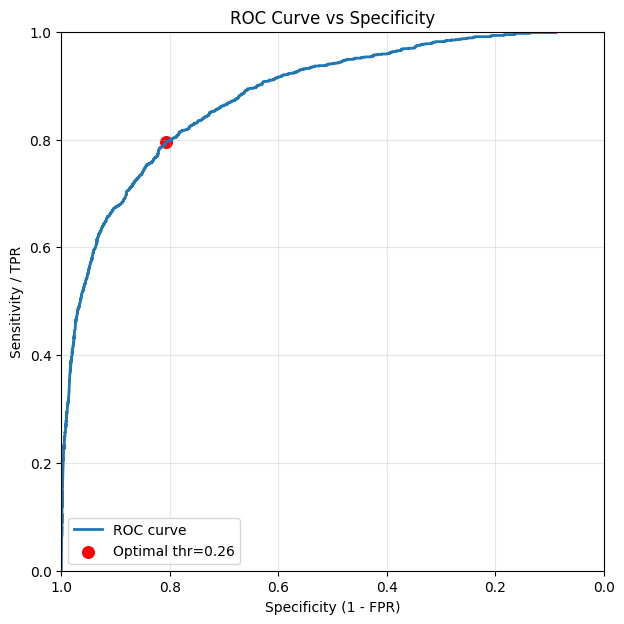

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Manual ROC computation
def roc_curve_manual(y_true, y_scores):
    # Sort scores descending
    order = np.argsort(-y_scores)
    y_true = y_true[order]
    y_scores = y_scores[order]

    thresholds = np.r_[np.inf, np.unique(y_scores)]
    tpr, fpr = [], []
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)

    for thr in thresholds:
        y_pred = (y_scores >= thr).astype(int)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        tpr.append(TP / P if P > 0 else 0)
        fpr.append(FP / N if N > 0 else 0)
    return np.array(fpr), np.array(tpr), thresholds

# Find optimal threshold: closest to top-left (max TPR, max specificity)
def optimal_threshold(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve_manual(y_true, y_scores)
    specificity = 1 - fpr
    distances = np.sqrt((1 - tpr)**2 + (1 - specificity)**2)
    idx = np.argmin(distances)
    return thresholds[idx], fpr, tpr, thresholds, idx


y_true = y_test
y_scores = model2.make_predictions_prob(X_test2,betas_model2)

best_thresh, fpr, tpr, thresholds, idx = optimal_threshold(y_true, y_scores)
specificity = 1 - fpr

# Plot ROC vs Specificity
plt.figure(figsize=(7,7))
order = np.argsort(-specificity)  # ensure left->right goes 1->0
plt.plot(specificity[order], tpr[order], lw=2, label='ROC curve')
plt.scatter(specificity[idx], tpr[idx], color='red', s=70, label=f'Optimal thr={best_thresh:.2f}')
plt.xlabel('Specificity (1 - FPR)')
plt.ylabel('Sensitivity / TPR')
plt.title('ROC Curve vs Specificity')
plt.xlim(1,0)  # top-left = high specificity
plt.ylim(0,1)
plt.legend(loc='lower left')
plt.grid(alpha=0.3)
plt.show()


In [211]:
y_pred2_new = model2.make_predictions(X_test=X_test2, betas=betas_model2, threshold=0.26)
print(ConfusionMatrix(y_true=y_test, y_pred=y_pred2_new))

Confusion Matrix:
TP: 1034, TN: 4286, FP: 1019, FN: 271
Accuracy: 0.8048, Precision: 0.5037, Recall (Sensitivity): 0.7923, Specificity: 0.8079, F1 Score: 0.6158
No Information Rate (NIR): 0.8026, p-value(Acc > NIR): 0.328
